##**Visão Computacional e Reconhecimento de Imagens**

**Desenvolvedor: Sérgio Assunção Monteiro, DSc**

# **Imagem Colorida x Imagem em Tons de Cinza**

In [1]:
import numpy as np
import cv2
from skimage import io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
origem = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
img_original = io.imread(origem) 
img_cinza = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)

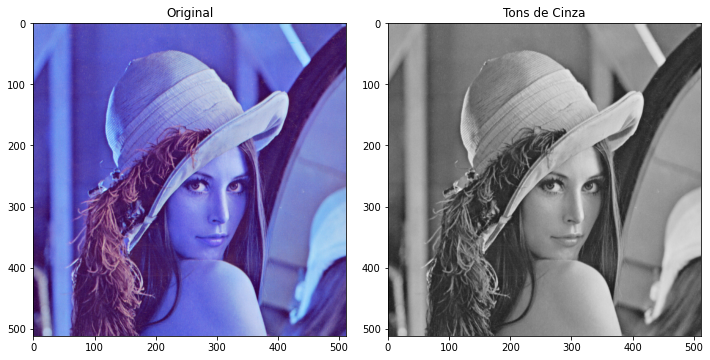

In [3]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(10, 6))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(img_original, 
                          cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv2.cvtColor(img_cinza, 
                          cv2.COLOR_BGR2RGB))
ax[1].set_title("Tons de Cinza")
plt.show()

# **TensorFlow**

**Importar Bibliotecas**

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

**Carregar os dados**

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(treinamento_imagens, treinamento_rotulos), (teste_imagens, teste_rotulos) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Nome das Classes**

In [6]:
nomes_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploração dos Dados**

In [7]:
print(f'(total de imagens, dimensão 1, dimensão 2)={treinamento_imagens.shape}')
print(f'rótulos={treinamento_rotulos} - São rotulados nas classes 0, 1, 2, 3, ...,9')
print(f'(total de imagens para teste, dimensão 1, dimensão 2)={teste_imagens.shape}')

(total de imagens, dimensão 1, dimensão 2)=(60000, 28, 28)
rótulos=[9 0 0 ... 3 0 5] - São rotulados nas classes 0, 1, 2, 3, ...,9
(total de imagens para teste, dimensão 1, dimensão 2)=(10000, 28, 28)


**Pré-processamento dos dados**

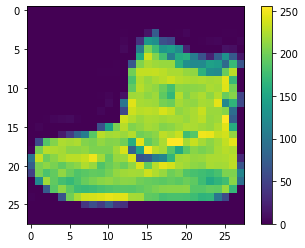

Explicação: exibindo a primeira imagem da base. Os dados numéricos se referem aos Pixels de 0 a 255.


In [8]:
plt.figure()
plt.imshow(treinamento_imagens[0])
plt.colorbar()
plt.grid(False)
plt.show()
print('Explicação: exibindo a primeira imagem da base. Os dados numéricos se referem aos Pixels de 0 a 255.')

**Reescalar os dados para a escala 0-1 para Redes Neurais**

In [9]:
treinamento_images = treinamento_imagens / 255.0
teste_imagens = teste_imagens / 255.0

**Exibir algumas imagens**

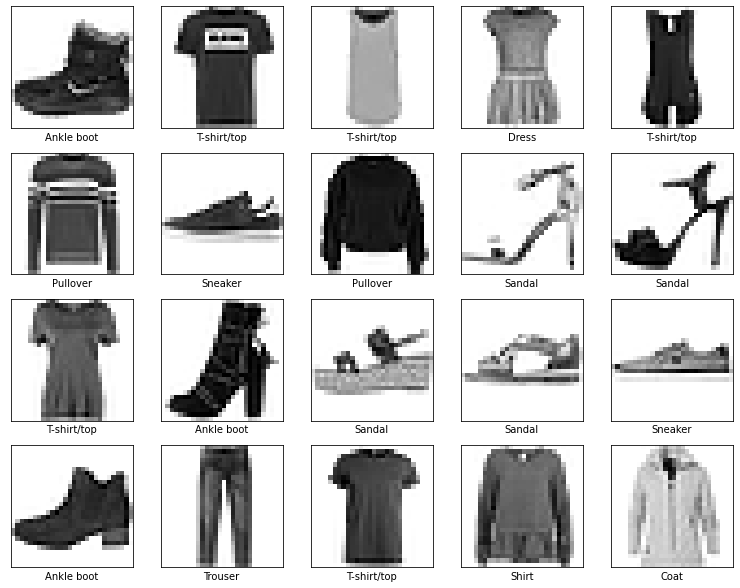

In [10]:
plt.figure(figsize=(13,13))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(treinamento_imagens[i], cmap=plt.cm.binary)
    plt.xlabel(nomes_classes[treinamento_rotulos[i]])
plt.show()

**Arquitetura da Rede**

In [11]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compilar o modelo**

In [12]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treinamento do Modelo**

In [13]:
modelo.fit(treinamento_imagens, 
           treinamento_rotulos, 
           epochs=50)

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 3.1807 - accuracy: 0.6914
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7001 - accuracy: 0.7421
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5892 - accuracy: 0.7940
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5384 - accuracy: 0.8115
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5167 - accuracy: 0.8217
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5133 - accuracy: 0.8209
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4995 - accuracy: 0.8278
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4977 - accuracy: 0.8286
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4878 - accuracy: 0.8302
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4

**Testar a precisão do Modelo**

In [14]:
perda_teste, precisao_teste = modelo.evaluate(teste_imagens, teste_rotulos)
print('Precisão dos Testes:', precisao_teste)

313/313 [==============================] - 1s 2ms/step - loss: 2.6878 - accuracy: 0.1627
Precisão dos Testes: 0.16269999742507935


**Realizando Predições**

In [15]:
predicoes = modelo.predict(teste_imagens)

313/313 [==============================] - 1s 2ms/step


In [16]:
predicoes[0]

array([0.21854681, 0.00143522, 0.00924226, 0.00573442, 0.00132682,
       0.29209524, 0.01358891, 0.17986986, 0.25735497, 0.02080545],
      dtype=float32)

In [17]:
melhor_classificacao=np.argmax(predicoes[0])
print(f'Posição do melhor resultado da primeira imagem de teste: {melhor_classificacao}')

Posição do melhor resultado da primeira imagem de teste: 5


Text(0.5, 1.0, 'Trouser')

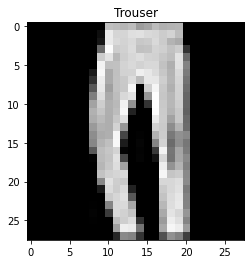

In [18]:
plt.figure(figsize=(14,4))
plt.imshow(np.reshape(teste_imagens[melhor_classificacao], (28,28)), cmap=plt.cm.gray)
plt.title(nomes_classes[teste_rotulos[melhor_classificacao]])